In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
# open the CC.csv file
CC = pd.read_csv('../Data/CC.csv')

# print the head of CC
print(CC.head())

# print the shape of CC
print(CC.shape)

# add a leading zero to the ZIP column so there are 5 digits
CC['ZIP'] = CC['ZIP'].apply(lambda x: f"{int(x):05}")

# prind the head
print(CC.head())



    ZIP  SOLDPRICE  SQFT    LOTSIZE  BEDS  BATHS  AGE  DOM
0  2474   410000.0  1368  1306800.0     2    2.0    3  897
1  2124   327000.0  1850     5000.0     2    2.5    5  658
2  2184   331000.0  1469        NaN     2    1.0   38  467
3  1949   580000.0  2945        NaN     2    2.5    4  565
4  2139  1000000.0  2536        NaN     3    2.5    3   56
(10956, 8)
     ZIP  SOLDPRICE  SQFT    LOTSIZE  BEDS  BATHS  AGE  DOM
0  02474   410000.0  1368  1306800.0     2    2.0    3  897
1  02124   327000.0  1850     5000.0     2    2.5    5  658
2  02184   331000.0  1469        NaN     2    1.0   38  467
3  01949   580000.0  2945        NaN     2    2.5    4  565
4  02139  1000000.0  2536        NaN     3    2.5    3   56


In [199]:
# get number of unique zip codes
print(CC['ZIP'].nunique())

# counts of each zip code
print(CC['ZIP'].value_counts())

# get the top 10 zip codes
print(CC['ZIP'].value_counts().head(10))

# get the top 10 zip codes
print(CC['ZIP'].value_counts().tail(10))



411
ZIP
02127    357
02130    274
01970    231
02116    218
02129    200
        ... 
04043      1
03856      1
33321      1
01542      1
02903      1
Name: count, Length: 411, dtype: int64
ZIP
02127    357
02130    274
01970    231
02116    218
02129    200
02118    199
02135    150
02446    137
02155    134
02139    132
Name: count, dtype: int64
ZIP
01469    1
06016    1
33064    1
06239    1
02343    1
04043    1
03856    1
33321    1
01542    1
02903    1
Name: count, dtype: int64


In [ ]:
# Questions and comments for professor:
# 1. When is the data from?
#       - we'll need to adjust the price and the days on the market (potential the square footage) based on the time frame
#       - normalization and fit to the current market means and std (more research obviously)
# 2. How do we account for the low-coverage zip codes?
#       - normalize to the the overall means? use the zillow/realtor data to estimate?
# 3. How do we incorporate market trends?
#       - we'd still need to forcast the trends using the realtor/ zillow data
# 4. Where is this data from?
#       - can we generalize to other zips / states / cities?

### BASIC EDA

In [200]:
# eda on the CC features
print(CC.info())

# get the descriptive statistics for the CC features
print(CC.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ZIP        10956 non-null  object 
 1   SOLDPRICE  10956 non-null  float64
 2   SQFT       10956 non-null  int64  
 3   LOTSIZE    2897 non-null   float64
 4   BEDS       10956 non-null  int64  
 5   BATHS      10956 non-null  float64
 6   AGE        10956 non-null  int64  
 7   DOM        10956 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 684.9+ KB
None
          SOLDPRICE          SQFT       LOTSIZE          BEDS         BATHS  \
count  1.095600e+04  10956.000000  2.897000e+03  10956.000000  10956.000000   
mean   4.719467e+05   1346.626689  3.688863e+05      2.085433      1.734346   
std    5.417744e+05   1466.060772  4.170060e+06      0.734744      0.731976   
min    2.615000e+04      0.000000  0.000000e+00      0.000000      0.500000   
25%    2.230000e+05    903.0

In [201]:
# print the zip codes (and their counts) that don't have the prefix of 01, 02, 05
for zip_code, count in CC['ZIP'].value_counts().items():
    if not zip_code.startswith(('01', '02', '05')):
        print(zip_code, count)

print("now the good ones")
# print the zip codes (and their counts) that do have the prefix of 01, 02, 05
for zip_code, count in CC['ZIP'].value_counts().items():
    if zip_code.startswith(('01', '02', '05')) and count < 10:
        print(zip_code, count)


03079 17
06082 15
03865 12
03063 11
03051 11
03811 8
03053 7
03054 6
03060 6
03062 6
03087 6
03044 4
03874 4
03842 4
03076 3
03038 3
06078 3
33909 3
03052 2
03848 2
03820 1
03031 1
03104 1
08145 1
03458 1
08164 1
03826 1
10915 1
03102 1
06088 1
00185 1
03109 1
03106 1
03857 1
03064 1
33442 1
03873 1
03042 1
06016 1
33064 1
06239 1
04043 1
03856 1
33321 1
now the good ones
01543 9
02719 9
01772 9
02657 9
01440 9
01504 9
01776 9
02745 9
01463 9
01603 9
01522 9
02364 8
02421 8
01464 8
01534 8
01468 8
01605 8
01564 8
01773 8
01843 7
01775 7
02053 7
02638 7
02721 7
01590 7
01505 7
01516 6
02339 6
01452 6
01503 6
02025 6
01740 6
01984 6
01985 6
02466 5
01566 5
02056 5
01474 5
02120 5
01834 5
02030 5
02770 5
02671 5
01571 5
02809 5
01983 5
01507 5
01523 5
02790 4
01922 4
02576 4
02748 4
02738 4
02655 4
01331 4
02771 4
02740 4
01944 3
02032 3
01473 3
02724 3
01540 3
02670 3
02468 3
01518 3
02302 3
02860 3
01908 3
02675 3
02909 3
02537 3
01529 3
02723 3
02653 3
01610 3
01833 3
01982 3
01460 2
0

In [202]:
# remove the zip codes that don't have the prefix of 01, 02, 05
CC = CC[CC['ZIP'].str.startswith(('01', '02', '05'))]

# print the shape of CC
print(CC.shape)

# print the head of CC
print(CC.head())



(10799, 8)
     ZIP  SOLDPRICE  SQFT    LOTSIZE  BEDS  BATHS  AGE  DOM
0  02474   410000.0  1368  1306800.0     2    2.0    3  897
1  02124   327000.0  1850     5000.0     2    2.5    5  658
2  02184   331000.0  1469        NaN     2    1.0   38  467
3  01949   580000.0  2945        NaN     2    2.5    4  565
4  02139  1000000.0  2536        NaN     3    2.5    3   56


In [203]:
import pandas as pd
#!pip install pgeocode
import pgeocode

data = CC[['ZIP']]

# # get the latitude and longitude for each zip code (first 10 distinct zip codes)
# for zip_code in data['ZIP'].unique()[:10]:
#     nomi = pgeocode.Nominatim('US')
#     location = nomi.query_postal_code(zip_code)
#     print(location.latitude, location.longitude)
    
# create a lat and long column for the CC dataframe
CC['lat'] = None
CC['long'] = None

# loop through the CC dataframe and get the latitude and longitude for each zip code
for index, row in CC.iterrows():
    nomi = pgeocode.Nominatim('US')
    location = nomi.query_postal_code(row['ZIP'])
    CC.at[index, 'lat'] = location.latitude
    CC.at[index, 'long'] = location.longitude

# print the head of CC
print(CC.head())

# print the shape of CC
print(CC.shape)



     ZIP  SOLDPRICE  SQFT    LOTSIZE  BEDS  BATHS  AGE  DOM      lat     long
0  02474   410000.0  1368  1306800.0     2    2.0    3  897  42.4202 -71.1565
1  02124   327000.0  1850     5000.0     2    2.5    5  658  42.2918 -71.0717
2  02184   331000.0  1469        NaN     2    1.0   38  467  42.2093 -70.9963
3  01949   580000.0  2945        NaN     2    2.5    4  565  42.5942  -71.013
4  02139  1000000.0  2536        NaN     3    2.5    3   56  42.3647 -71.1042
(10799, 10)


In [204]:
# hard coded zips that are not in the pgeocode database
zip_lat_lon = {
    2625: (41.6485, -70.3475),
    2031: (42.1579, -71.1762),
    2068: (42.0248, -71.1022),
    2425: (42.3318, -71.1212),
    2469: (42.2965, -71.2921),
    2154: (42.3765, -71.2356)
}

# add the lat and long for the hard coded zips
for zip_code, (lat, long) in zip_lat_lon.items():
    CC.loc[CC['ZIP'] == zip_code, 'lat'] = lat
    CC.loc[CC['ZIP'] == zip_code, 'long'] = long

# print the head of CC
print(CC.head())

# get number of NaN values in lat and long
print(CC['lat'].isna().sum())
print(CC['long'].isna().sum())




     ZIP  SOLDPRICE  SQFT    LOTSIZE  BEDS  BATHS  AGE  DOM      lat     long
0  02474   410000.0  1368  1306800.0     2    2.0    3  897  42.4202 -71.1565
1  02124   327000.0  1850     5000.0     2    2.5    5  658  42.2918 -71.0717
2  02184   331000.0  1469        NaN     2    1.0   38  467  42.2093 -70.9963
3  01949   580000.0  2945        NaN     2    2.5    4  565  42.5942  -71.013
4  02139  1000000.0  2536        NaN     3    2.5    3   56  42.3647 -71.1042
6
6


In [170]:
# print head
print(CC.head())

# print the shape of CC
print(CC.shape)





    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  zip_cluster
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565       2474.0
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717       2124.0
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963       2184.0
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130       1949.0
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042       2139.0
(10799, 10)


In [205]:
# remove lotsize 
CC = CC.drop(columns=['LOTSIZE'])

# print the head of CC
print(CC.head())

# print the shape of CC
print(CC.shape)



     ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long
0  02474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565
1  02124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717
2  02184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963
3  01949   580000.0  2945     2    2.5    4  565  42.5942  -71.013
4  02139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042
(10799, 9)


In [206]:
# write to csv
CC.to_csv('../Data/CC_cleaned.csv', index=False)



In [207]:
# read in the cleaned data
CC = pd.read_csv('../Data/CC_cleaned.csv')

# print the head of CC
print(CC.head())

# print the shape of CC
print(CC.shape)



    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042
(10799, 9)


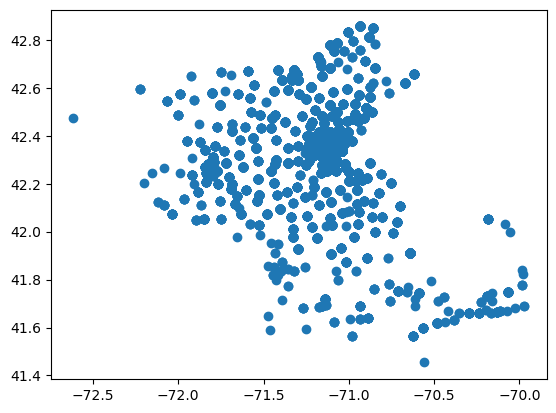

367


In [208]:
# plot the latitude and longitude for each zip code
plt.scatter(CC['long'], CC['lat'])
plt.show()


# print the number of unique zip codes
print(CC['ZIP'].nunique())



In [209]:
# map the zip codes with less than 10 counts to zip codes with more than 10 counts

# create zip code and count dataframe, with lat and long
zip_code_count = CC[['ZIP', 'lat', 'long']].drop_duplicates().reset_index(drop=True)
zip_code_count.columns = ['ZIP', 'lat', 'long']
#print(zip_code_count.head())

# # how many distinct zip codes
# print(zip_code_count['ZIP'].nunique())


# # type of the above column
# print(type(zip_code_count['count']))

# # check if zip count is correct for zip 2474
# print(CC[CC['ZIP'] == 2474].shape[0] == zip_code_count[zip_code_count['ZIP'] == 2474]['count'])


# print df
#print(zip_code_count)

# create a new column called 'zip_cluster', which will be the same as ZIP for zip codes with count greater than 10

In [210]:
# create a new column called 'zip_cluster', which will be the same as ZIP for zip codes with count greater than 10
# otherwise, it will be the zip code closest to the zip code with count >10 using the lat and long (euclidean distance)
# every zip code should have a zip_cluster

for index, row in zip_code_count.iterrows():
    if CC[CC['ZIP'] == row['ZIP']].shape[0] < 10:
        # find min distance to a zip code with count > 10
        min_distance = float('inf')
        for index2, row2 in zip_code_count.iterrows():
            if CC[CC['ZIP'] == row2['ZIP']].shape[0] > 10:
                distance = ((row['lat'] - row2['lat']) ** 2 + (row['long'] - row2['long']) ** 2) ** 0.5
                if distance < min_distance:
                    min_distance = distance
                    zip_code_count.at[index, 'zip_cluster'] = row2['ZIP']
    else:
        zip_code_count.at[index, 'zip_cluster'] = row['ZIP']
                    
# print the head of zip_code_count order by count ascending
#print(zip_code_count.sort_values(by='count', ascending=True).tail())

# print count of unique zip_clusters
print(zip_code_count['zip_cluster'].nunique())



KeyError: 'count'

In [211]:
# print the counts of each zip_cluster, then order by count
print(zip_code_count['zip_cluster'].value_counts().sort_values(ascending=False))

# count how many zip codes have less than 10 rows in the CC dataframe
print(CC['ZIP'].value_counts().loc[lambda x: x < 10].count())



zip_cluster
2703.0    14
2720.0    11
2631.0     9
1420.0     8
2639.0     6
          ..
2132.0     1
1940.0     1
1850.0     1
1952.0     1
2482.0     1
Name: count, Length: 213, dtype: int64
154


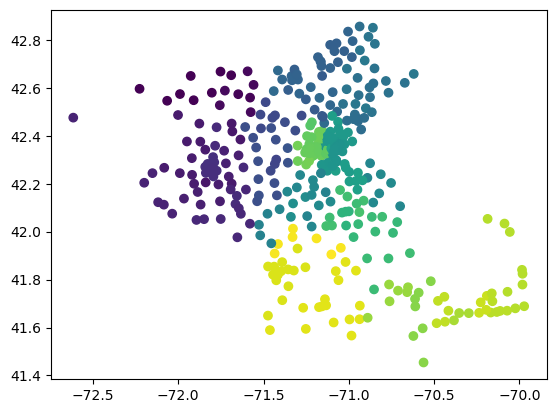

zip_cluster
2703.0    14
2720.0    11
2631.0     9
1420.0     8
2639.0     6
          ..
2132.0     1
1940.0     1
1850.0     1
1952.0     1
2482.0     1
Name: count, Length: 213, dtype: int64


In [212]:
# scatter plot the zip codes like above, but color code by zip_cluster
plt.scatter(zip_code_count['long'], zip_code_count['lat'], c=zip_code_count['zip_cluster'])
plt.show()




# count number of zip codes in each zip_cluster
print(zip_code_count['zip_cluster'].value_counts().sort_values(ascending=False))


In [188]:
# print number of unique zip_clusters
print(zip_code_count['zip_cluster'].nunique())

# print number of unique zip codes
print(CC['ZIP'].nunique())

# add zip_cluster to the CC dataframe

213
367


In [156]:
# print rows of zip_code_count where zip cluster is different from ZIP
print(zip_code_count[zip_code_count['zip_cluster'] != zip_code_count['ZIP']])



      ZIP      lat     long  count  zip_cluster
43   2339  42.1214 -70.8570   2190       2061.0
55   1373  42.4756 -72.6153   2478       1550.0
63   2466  42.3441 -71.2480   1757       2453.0
68   1773  42.4217 -71.3137   1545       1742.0
83   2032  42.1532 -71.2179   2476       2062.0
..    ...      ...      ...    ...          ...
362  2779  41.8353 -71.0765   2635       2718.0
363  2802  41.9512 -71.4545   1462       2019.0
364  2652  42.0338 -70.0875   1885       2631.0
365  2334  42.0235 -71.1324   2557       2375.0
366  2903  41.8200 -71.4158   2903       2703.0

[148 rows x 5 columns]


In [213]:
# add zip_cluster to the CC dataframe
for index, row in CC.iterrows():
    CC.at[index, 'zip_cluster'] = zip_code_count[zip_code_count['ZIP'] == row['ZIP']]['zip_cluster'].values[0]

# print the head of CC
print(CC.head())

# print the shape of CC
print(CC.shape)

# write to csv
CC.to_csv('../Data/CC_cleaned.csv', index=False)



# print rows of CC where zip_cluster is different from ZIP
print(CC[CC['zip_cluster'] != CC['ZIP']])



    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  zip_cluster
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565       2474.0
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717       2124.0
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963       2184.0
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130       1949.0
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042       2139.0
(10799, 10)
        ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  \
53     2339   450000.0   630     1    1.0   56   99  42.1214 -70.8570   
67     1373   135400.0   731     2    1.0   39    6  42.4756 -72.6153   
84     2466   570000.0  1290     2    2.0  114   22  42.3441 -71.2480   
95     1773   406000.0   742     1    1.0   13   46  42.4217 -71.3137   
111    2339   499000.0  1597     2    2.5  128   10  42.1214 -70.8570   
...     ...        ...   ...   ...    ...  ...  ...      ...      ...   
107

In [214]:
# get head of CC
print(CC.head())







    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  zip_cluster
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565       2474.0
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717       2124.0
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963       2184.0
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130       1949.0
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042       2139.0


In [215]:
# remove previous csv and write CC to new one
CC.to_csv('../Data/CC_cleaned.csv', index=False)

In [69]:
# print count of each column
print(CC.count())

ZIP            10799
SOLDPRICE      10799
SQFT           10799
BEDS           10799
BATHS          10799
AGE            10799
DOM            10799
lat            10793
long           10793
zip_cluster      367
dtype: int64


In [55]:
# read in Data/realtor/RDC_Inventory_Core_Metrics_State_History.csv
realtor = pd.read_csv('../Data/realtor/RDC_Inventory_Core_Metrics_State_History.csv')

# # print the head of realtor
# print(realtor.head())

# # print the shape of realtor
# print(realtor.shape)

# filter to Massachusetts
realtor = realtor[realtor['state'] == 'Massachusetts']

# print the head of realtor
print(realtor.head())

# print the shape of realtor
print(realtor.shape)


     month_date_yyyymm          state state_id  median_listing_price  \
20              202409  Massachusetts       MA                779500   
56              202408  Massachusetts       MA                779900   
135             202407  Massachusetts       MA                799450   
165             202406  Massachusetts       MA                835000   
243             202405  Massachusetts       MA                849950   

     median_listing_price_mm  median_listing_price_yy  active_listing_count  \
20                   -0.0005                   0.0013                 10026   
56                   -0.0245                  -0.0027                  8966   
135                  -0.0426                   0.0006                  8936   
165                  -0.0176                   0.0451                  8891   
243                   0.0624                   0.0638                  7544   

     active_listing_count_mm  active_listing_count_yy  median_days_on_market  \
20          

In [39]:
# get min and max month_date_yyyymm
print("min month_date_yyyymm: ", realtor['month_date_yyyymm'].min())
print("max month_date_yyyymm: ", realtor['month_date_yyyymm'].max())

# get the median_days_on_market and median_listing_price for month_date_yyyymm = 201601
print("median_days_on_market: ", realtor[realtor['month_date_yyyymm'] == 201607]['median_days_on_market'])
print("median_listing_price: ", realtor[realtor['month_date_yyyymm'] == 201607]['median_listing_price'])



min month_date_yyyymm:  201607
max month_date_yyyymm:  202409
median_days_on_market:  5046    58
Name: median_days_on_market, dtype: int64
median_listing_price:  5046    439000
Name: median_listing_price, dtype: int64


In [42]:
# median days on market and median listing price for the CC dataframe
print("median_days_on_market: ", CC['DOM'].median())
print("median_listing_price: ", CC['SOLDPRICE'].median())



median_days_on_market:  29.0
median_listing_price:  358000.0


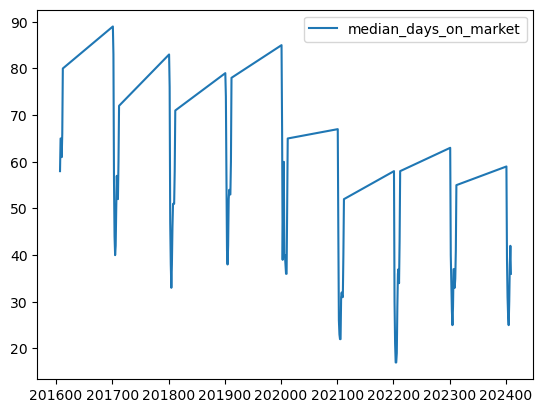

In [44]:
# plot the median_days_on_market and median_listing_price in ME in the realtor dataframe
plt.plot(realtor['month_date_yyyymm'], realtor['median_days_on_market'], label='median_days_on_market')
plt.legend()
plt.show()



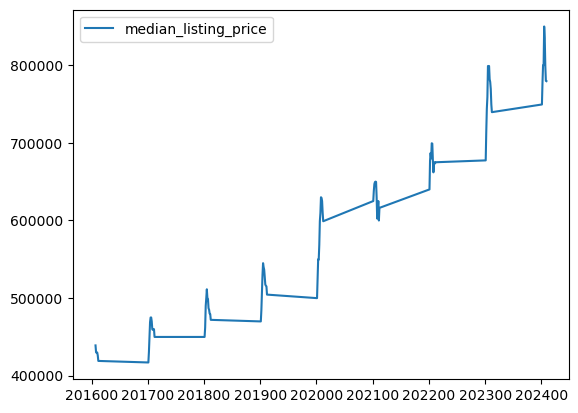

most recent month median_days_on_market:  20    36
Name: median_days_on_market, dtype: int64
most recent month median_listing_price:  20    779500
Name: median_listing_price, dtype: int64


In [46]:
# same for the listing price
plt.plot(realtor['month_date_yyyymm'], realtor['median_listing_price'], label='median_listing_price')
plt.legend()
plt.show()

# print most recent month median_days_on_market and median_listing_price
print("most recent month median_days_on_market: ", realtor[realtor['month_date_yyyymm'] == realtor['month_date_yyyymm'].max()]['median_days_on_market'])
print("most recent month median_listing_price: ", realtor[realtor['month_date_yyyymm'] == realtor['month_date_yyyymm'].max()]['median_listing_price'])







In [47]:
# read in the Data/zillow/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv
zillow = pd.read_csv('../Data/zillow/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

# print the head of zillow
print(zillow.head())

# print the shape of zillow
print(zillow.shape)



   RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     91982         1       77494        zip        TX    TX      Katy   
1     61148         2        8701        zip        NJ    NJ  Lakewood   
2     91940         3       77449        zip        TX    TX      Katy   
3     62080         4       11368        zip        NY    NY  New York   
4     91733         5       77084        zip        TX    TX   Houston   

                                   Metro        CountyName     2000-01-31  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  212757.568407   
1  New York-Newark-Jersey City, NY-NJ-PA      Ocean County  139171.687163   
2   Houston-The Woodlands-Sugar Land, TX     Harris County  103736.197118   
3  New York-Newark-Jersey City, NY-NJ-PA     Queens County  147341.057200   
4   Houston-The Woodlands-Sugar Land, TX     Harris County  102296.421002   

   ...     2023-11-30     2023-12-31     2024-01-31     2024-02-29  \
0  ...  492924.222260 

In [48]:
# filter to the zips found in the CC dataframe
zillow = zillow[zillow['RegionName'].isin(CC['ZIP'].unique())]

# print the head of zillow
print(zillow.head())

# print the shape of zillow
print(zillow.shape)

#


     RegionID  SizeRank  RegionName RegionType StateName State      City  \
242     58710       248        2301        zip        MA    MA  Brockton   
307     58660       314        2148        zip        MA    MA    Malden   
419     58666       429        2155        zip        MA    MA   Medford   
457     58663       467        2151        zip        MA    MA    Revere   
537     58669       547        2169        zip        MA    MA    Quincy   

                              Metro        CountyName     2000-01-31  ...  \
242  Boston-Cambridge-Newton, MA-NH   Plymouth County  126909.145350  ...   
307  Boston-Cambridge-Newton, MA-NH  Middlesex County  166669.023413  ...   
419  Boston-Cambridge-Newton, MA-NH  Middlesex County  211805.483819  ...   
457  Boston-Cambridge-Newton, MA-NH    Suffolk County  152469.112381  ...   
537  Boston-Cambridge-Newton, MA-NH    Norfolk County  169618.695725  ...   

        2023-11-30     2023-12-31     2024-01-31     2024-02-29  \
242  473932.5

In [58]:
# show column '2016-06-30'
print(zillow['2016-06-30'])

# get datatype of the cc zip column and the zillow regionname column
print(CC['ZIP'].dtype)
print(zillow['RegionName'].dtype)

# get the average "expected" price by adding the median corresponding zillow price for each occurence of a zip code in the CC dataframe

242      246770.815527
307      372114.917254
419      492793.688577
457      338322.970368
537      366304.311392
             ...      
23466    185958.336989
23897    480299.681726
24923    431520.743388
25372    567037.229055
26088    270242.815465
Name: 2016-06-30, Length: 349, dtype: float64
int64
int64


In [68]:
CC = pd.read_csv('../Data/CC_cleaned.csv')

# match Zillow RegionName to CC zip_cluster when zip code is 2301
for index, row in CC.iterrows():
    #print(row['ZIP'])
    if row['ZIP'] == 2474:
        print(row['zip_cluster'])

# get the average "expected" price by adding the median corresponding zillow price for each occurence of a zip code in the CC dataframe

2474.0
2151.0
2425.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [53]:
# get the average "expected" price by adding the median corresponding zillow price for each occurence of a zip code in the CC dataframe
# and then dividing by the number of occurences
# read in the CC_cleaned.csv file


sum = 0
for index, row in CC.iterrows():
    # fix zip code to 5 digits
    # print the 
    zillow_price = zillow[zillow['RegionName'] == row['ZIP']]['2016-06-30']
    sum += zillow_price

print(sum / len(CC))


/var/folders/sp/_mjrzq3j7cx5cnmtdrl_njsr0000gn/T/ipykernel_1800/203721619.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '02474' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row['ZIP'] = f"{int(row['ZIP']):05}"
/var/folders/sp/_mjrzq3j7cx5cnmtdrl_njsr0000gn/T/ipykernel_1800/203721619.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '02124' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row['ZIP'] = f"{int(row['ZIP']):05}"
/var/folders/sp/_mjrzq3j7cx5cnmtdrl_njsr0000gn/T/ipykernel_1800/203721619.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '02184' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row['ZIP'] = f"{int(row['ZIP']):05}"
/

Series([], Name: 2016-06-30, dtype: float64)


/var/folders/sp/_mjrzq3j7cx5cnmtdrl_njsr0000gn/T/ipykernel_1800/203721619.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '02916' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row['ZIP'] = f"{int(row['ZIP']):05}"
/var/folders/sp/_mjrzq3j7cx5cnmtdrl_njsr0000gn/T/ipykernel_1800/203721619.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '02303' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row['ZIP'] = f"{int(row['ZIP']):05}"
/var/folders/sp/_mjrzq3j7cx5cnmtdrl_njsr0000gn/T/ipykernel_1800/203721619.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '01983' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row['ZIP'] = f"{int(row['ZIP']):05}"
/